<center>
    <h1 id='dimensionality-reduction' style='color:#7159c1'>⚙️ Dimensionality Reduction ⚙️</h1>
    <i>Reducing Datasets Dimensionality</i>
</center>

---

`Dimensionality Reduction` is the process to decrease the number of features from a DataSet combining them to create a new small number of features called `Components`. To apply this technique, your DataSet must attend the following requisition:

> **Encoding** - `all Categorical Features must be Encoded, since Dimensionality Reduction works out just with Numerical Features`;

> **Standardization** - `the features must be standardized, unless you know you have good reason not to, such as, the DataSet is already standardized by default`;

> **Outliers** - `outliers must be treated being removed or constrained, since they can have an undue influence on the results`.

<br />

Some situations when you can use Dimensionality Reduction:

1. when you desire to check out whether clusters have similar properties and attributes;

2. when the DataSet contains lot of features (Dataset Compression to two or three features);

3. when the features are multi-colinear (there is a significant number of Linear Correlations between them);
	
4. when your goal is to apply denoising.

<br />

Variations of Dimensionality Reduction:

> **Principal Component Analisys (PCA)** - `maximizes the variance`;

> **t-Distributed Stochastic Neighbor Embedding (t-SNE)** - `creates a reduced feature space where similar samples are modeled by nearby points and dissimilar samples are modeled by distant points with high probability`;

> **Uniform Manifold Approximation and Projection (UMAP)** - `applies Nearest Neighbors to cluster the datas and then reducts the dimensions`.

<h1 id='0-principal-component-analysis-pca' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Principal Component Analysis (PCA)</h1>

`Principal Component Analysis (PCA)` is used to create new Features combining other Features. In general, we get these new Features by tracing diagonal lines (axes) over the scatter plot between the two features we would like calculate the PCA. After that, the model will calculate the correlation and the variance between these two features and return the Components
(new Features).

These new features are called the principal components of the data. The weights themselves are called loadings. There will be as many principal components as there are features in the original dataset: if we had used ten features instead of two, we would have ended up with ten components.

In [1]:
# ---- Settings ----
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install mplcyberpunk
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import seaborn as sns # pip install seaborn
from sklearn.feature_selection import mutual_info_regression # pip install sklearn
from sklearn.decomposition import PCA

plt.style.use('cyberpunk')
np.random.seed(20241901)

def plot_variance(pca, width=8.0, dpi=100):
    """
    \ Description:
        - plots Principal Component Analysis Results.
    
    \ Parameters:
        - pca: Principal Component Analysis SKLearn Object;
        - width: float;
        - dpi: integer.
    """
    # Create figure #
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance #
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

    # Cumulative Variance #
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

    # Set up figure #
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    """
    \ Description:
        - Calculates Mutual Information only of discrete features of a dataset.
    
    \ Parameters:
        - X: Pandas DataFrame;
        - y: Pandas Series;
        - discrete_features: boolean.
    """
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

---

We've selected four features that cover a range of properties. Each of these features also has a high MI score with the target, price. We'll standardize the data since these features aren't naturally on the same scale.

We say that the features are not in the same scale when their ratio are different in a highly way, such as: person's age and  salary, while a person's age varies from 0 - 100, the salary can vary between 1,000 - 1,000,000. There's a huge gap between them, so we gotta scale the features in order to tthe model doesn't think that salary is more important than age just because the values are higher.

In [2]:
# ---- Reading Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
features = ['highway_mpg', 'engine_size', 'horsepower', 'curb_weight']

X = autos_df.copy()
y = X.pop('price')
X = X.loc[:, features]

X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [3]:
# ---- Calculating Principal Component Analysis ----
pca = PCA(n_components=2) # reduces dataset to 2 dimensions

X_pca = pca.fit_transform(X_scaled)
component_names = [f'PC{index+1}' for index in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

print(f'- Variance Ration: {pca.explained_variance_ratio_}')
print('---')
X_pca.head()

- Variance Ration: [0.85411424 0.06648926]
---


,PC1,PC2
0,0.382486,-0.400222
1,0.382486,-0.400222
2,1.550890,-0.107175
3,-0.408859,-0.425947
4,1.132749,-0.814565


In [4]:
# ---- Getting the Loadings ----
#
# - loadings are the variance and correlations between each created component
#
loadings = pd.DataFrame(
    pca.components_.T  # transpose the matrix of loadings
    , columns=component_names # so the columns are the principal components
    , index=X.columns # and the rows are the original features
)

loadings

,PC1,PC2
highway_mpg,-0.492347,0.770892
engine_size,0.503859,0.626709
horsepower,0.500448,0.013788
curb_weight,0.503262,0.113008


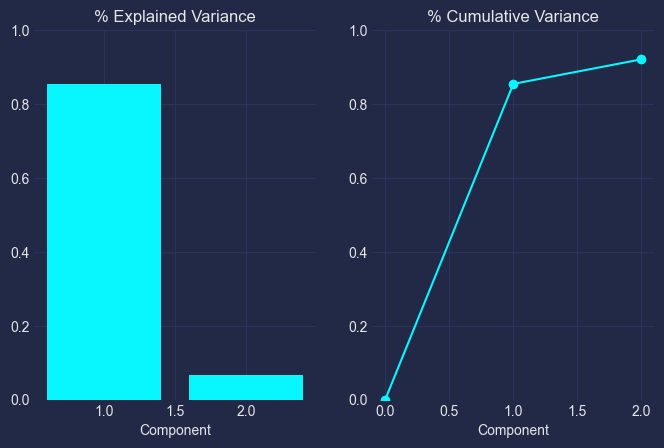

In [5]:
# ---- Calculating and Plotting Mutual Scores ----
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
plot_variance(pca)
plt.show()

---

This table of loadings is telling us that in the Size component, Height and Diameter vary in the same direction (same sign), but in the Shape component they vary in opposite directions (opposite sign).

In each component, the loadings are all of the same magnitude and so the features contribute equally in both.

<h1 id='1-tSNE' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | t-SNE</h1>

`t-SNE` is used when we have a dataset composed of 3 distinct classes in a 2D plot and we want to convert it to a 1D plot maintaining the differences and distances between each cluster.

This technique is not available on sstable version of sklearn, that's because the code thrown an error. In order to use it, you have to download the development version of sklearn using pip.

In [ ]:
# ---- Settings ----
from sklearn.manifold import TNSE

# ---- Applying t-SNE ----
#
# \ n_components: number of compoennts / dimensions
#
# \ verbose: logger (1 >> true / 0 >> false)
#
# \ perplexity: number of nearest neighbors that is used
# to Manifold Learning Algorithms. This value should be fine
# between 5 and 50 and as larger the DataSet is, the larger
# its value should be
#
# \ n_iter: number of iterations to run the algorithm's process
# of learning
#
tsne = TSNE(n_components=2, verbose=0, parplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne.head()

# ---- Plotting the Result ----
palette = sns.color_palette("bright", 10)

sns.scatterplot(
    X_tsne[:,0]
    , X_tsne[:,1]
    , hue=y
    , legend='full'
    , palette=palette
)

<h1 id='2-umap' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>2 | UMAP</h1>

`UMAP` is another Dimensionality Reduction Technique that, different from PCA and t-SNE, applies Nearest Neighbors to cluster the datas and them reduct the dimensions.

In [15]:
# ---- Settings ----
import umap # pip install umap-learn

# ---- Applying Umapping (Unsupervisioned Learning) ----
reducer = umap.UMAP(
    n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
    n_components=3, # default 2, The dimension of the space to embed into.
    metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
    n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
    learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
    init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
    min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
    spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
    low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
    set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
    local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
    repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
    negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
    transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
    a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
    b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
    random_state=20241901, # default: None, If int, random_state is the seed used by the random number generator;
    metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
    angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
    target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
    #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
    #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
    #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
    transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
    verbose=False, # default False, Controls verbosity of logging.
    unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
    n_jobs=1 # number of cpu cores to be used.
)

X_trans = reducer.fit_transform(X_scaled)
print(f'- Shape of X_trans: {X_trans.shape}')

- Shape of X_trans: (193, 3)


In [19]:
# ---- Applying Umapping (Supervisioned Learning) ----
reducer_2 = umap.UMAP(
    n_neighbors=100
    , n_components=3
    , n_epochs=1000
    , min_dist=0.5
    , local_connectivity=2
    , random_state=20241901
    , n_jobs=1
)

X_res = reducer_2.fit_transform(X_scaled, y)
print(f'- Shape of X_res: {X_res.shape}')

- Shape of X_res: (193, 3)


---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).